<a href="https://colab.research.google.com/github/SHIVAA007/Chennai_House_Price_Prediction--Shiva-Narayan/blob/main/Guvi_DS_D14__Chennai_House_Price_Prediction_Shiva_Narayan_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GUVI-IITM DATA SCIENCE PROGRAMMING : FINAL PROJECT**

**BATCH : D14**

**PROJECT NAME : CHENNAI HOUSE PRICE PREDICTION**

**PROBLEM STATEMENT**

Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and **also help the sellers understand what factors are fetching more money for the houses?**

**DATA**

The historical sale data is available here ("/content/train-chennai-sale.csv")

**MINIMUM REQUIRNMENTS**


It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.







**FINAL PROJECT BY : N SHIVA NARAYAN**

                  gmail : (catchshiva1993@gmail.com)
                     ph : (+91 9962474704) 

**DATA PROCESSING**

  **Importing Packages**




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings 
warnings.filterwarnings('ignore')

**Reading the file and convert into Dataframe**

In [ ]:
from google.colab import files
files.upload()

Saving train-chennai-sale.csv to train-chennai-sale.csv


{'train-chennai-sale.csv': b'PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE\r\nP03210,Karapakkam,1004,04-05-2011,131,1,1,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4,3.9,4.9,4.33,380000,144400,7600000\r\nP09411,Anna Nagar,1986,19-12-2006,26,2,1,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770\r\nP01812,Adyar,909,04-02-2012,70,1,1,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.09,421094,92114,13159200\r\nP05346,Velachery,1855,13-03-2010,14,3,2,5,Family,No,18-03-1988,Others,NoSewr ,Paved,I,4.7,3.9,3.6,4.01,356321,77042,9630290\r\nP06210,Karapakkam,1226,05-10-2009,84,1,1,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3,2.5,4.1,3.29,237000,74063,7406250\r\nP00219,Chrompet,1220,11-09-2014,36,2,1,4,Partial,No,12-09-2009,Commercial,NoSeWa,No Access,RH,4.5,2

In [ ]:
df=pd.read_csv("/content/train-chennai-sale.csv")
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


**Summary of Dataset**

In [ ]:
print("Number of data points in data:{0} and Number of features in data:{1}".format(df.shape[0],df.shape[1]))

Number of data points in data:7109 and Number of features in data:22


In [ ]:
df.shape

(7109, 22)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
INT_SQFT,7109.0,1.382073e+03,4.574109e+02,500.0,993.00,1373.0,1744.00,2500.00
DIST_MAINROAD,7109.0,9.960318e+01,5.740311e+01,0.0,50.00,99.0,148.00,200.00
N_BEDROOM,7108.0,1.637029e+00,8.029016e-01,1.0,1.00,1.0,2.00,4.00
N_BATHROOM,7104.0,1.213260e+00,4.096387e-01,1.0,1.00,1.0,1.00,2.00
N_ROOM,7109.0,3.688704e+00,1.019099e+00,2.0,3.00,4.0,4.00,6.00
QS_ROOMS,7109.0,3.517471e+00,8.919724e-01,2.0,2.70,3.5,4.30,5.00
QS_BATHROOM,7109.0,3.507244e+00,8.978337e-01,2.0,2.70,3.5,4.30,5.00
QS_BEDROOM,7109.0,3.485300e+00,8.872664e-01,2.0,2.70,3.5,4.30,5.00
QS_OVERALL,7061.0,3.503254e+00,5.272229e-01,2.0,3.13,3.5,3.89,4.97
REG_FEE,7109.0,3.769383e+05,1.430707e+05,71177.0,272406.00,349486.0,451562.00,983922.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

**Checking the NULL Values**

In [ ]:
df.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

**Copying the Dataset:**

In [ ]:
data1=df.copy()

**Deleting the PRT_ID column which does not contain any information, which effect the sales price**

In [ ]:
data1=data1.drop(columns='PRT_ID')

**Visualization of NULL Value**

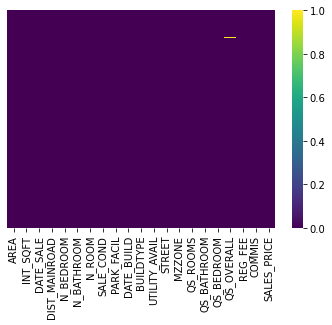

In [ ]:
sns.heatmap(data1.isnull(),yticklabels=False,cmap='viridis')

**Calculating Percentage of Missing Values**

In [ ]:
features_with_na=[features for features in data1.columns if data1[features].isnull().sum()>0]
for feature in features_with_na:
  print(feature, np.round(data1[feature].isnull().mean(), 4),  '%missing value')


N_BEDROOM 0.0001 %missing value
N_BATHROOM 0.0007 %missing value
QS_OVERALL 0.0068 %missing value


----> *Interpretation:*

Here, I have checked the percentages of nan values present in each feature, then list out the features which has missing values first and finally printed the feature name and the percentage of missing values upto 4 decimal values.

Note: Since the percentage of missing values is very very low. Therefore we can delete those values from the dataset, because it will not affect the target value much(sales price).

**Dropping the NULL Values**

In [ ]:
data1=data1.dropna(how='any',axis=0)
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7056 non-null   object 
 1   INT_SQFT       7056 non-null   int64  
 2   DATE_SALE      7056 non-null   object 
 3   DIST_MAINROAD  7056 non-null   int64  
 4   N_BEDROOM      7056 non-null   float64
 5   N_BATHROOM     7056 non-null   float64
 6   N_ROOM         7056 non-null   int64  
 7   SALE_COND      7056 non-null   object 
 8   PARK_FACIL     7056 non-null   object 
 9   DATE_BUILD     7056 non-null   object 
 10  BUILDTYPE      7056 non-null   object 
 11  UTILITY_AVAIL  7056 non-null   object 
 12  STREET         7056 non-null   object 
 13  MZZONE         7056 non-null   object 
 14  QS_ROOMS       7056 non-null   float64
 15  QS_BATHROOM    7056 non-null   float64
 16  QS_BEDROOM     7056 non-null   float64
 17  QS_OVERALL     7056 non-null   float64
 18  REG_FEE 

After removing NULL Values, the Dataframe reduced to (7056,21)

**Dropping Duplicates if Any**

In [ ]:
data1=data1.drop_duplicates()
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7056 non-null   object 
 1   INT_SQFT       7056 non-null   int64  
 2   DATE_SALE      7056 non-null   object 
 3   DIST_MAINROAD  7056 non-null   int64  
 4   N_BEDROOM      7056 non-null   float64
 5   N_BATHROOM     7056 non-null   float64
 6   N_ROOM         7056 non-null   int64  
 7   SALE_COND      7056 non-null   object 
 8   PARK_FACIL     7056 non-null   object 
 9   DATE_BUILD     7056 non-null   object 
 10  BUILDTYPE      7056 non-null   object 
 11  UTILITY_AVAIL  7056 non-null   object 
 12  STREET         7056 non-null   object 
 13  MZZONE         7056 non-null   object 
 14  QS_ROOMS       7056 non-null   float64
 15  QS_BATHROOM    7056 non-null   float64
 16  QS_BEDROOM     7056 non-null   float64
 17  QS_OVERALL     7056 non-null   float64
 18  REG_FEE 

**Cross checking for still any NULL Values are present in data through Heatmap plot**

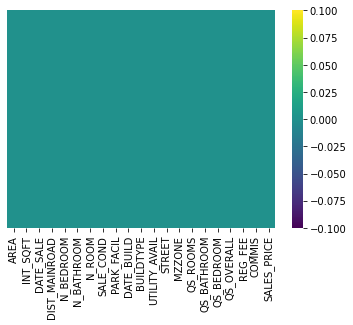

In [ ]:
sns.heatmap(data1.isnull(),yticklabels=False,cmap='viridis')

From the above plot, we can observe that there is no NULL Values in any feature considered.

**Statictics of Features**

In [ ]:
for i in data1.columns:
  print("Statictics for feature : {0}".format(i))
  print(data1[i].describe())
  print("----------------------------------------")

Statictics for feature : AREA
count         7056
unique          17
top       Chrompet
freq          1671
Name: AREA, dtype: object
----------------------------------------
Statictics for feature : INT_SQFT
count    7056.000000
mean     1381.316752
std       457.860850
min       500.000000
25%       991.000000
50%      1369.500000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64
----------------------------------------
Statictics for feature : DATE_SALE
count           7056
unique          2794
top       06-10-2009
freq              12
Name: DATE_SALE, dtype: object
----------------------------------------
Statictics for feature : DIST_MAINROAD
count    7056.000000
mean       99.569161
std        57.403870
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64
----------------------------------------
Statictics for feature : N_BEDROOM
count    7056.000000
mean        1.636621
s

**Converting data column features into Datatime objects which are in object type**

In [ ]:
data1["DATE_SALE"] = pd.to_datetime(data1["DATE_SALE"])
data1['DATE_BUILD']=pd.to_datetime(data1['DATE_BUILD'])

**Considering Years from Datatime for comparison purpose**

In [ ]:
data1['Yearsold']=data1['DATE_SALE'].dt.year
data1['Yearbuild']=data1['DATE_BUILD'].dt.year

**House Life Time Calculation**

In [ ]:
data1['Houselife']=data1['Yearsold']-data1['Yearbuild']

Since the dates in the 'DATE_SALE' and 'DATE_BUILD' didn't impact the target(sales price). Therefore dropping from the data to predict the target.

In [ ]:
data1=data1.drop(columns=["DATE_SALE","DATE_BUILD"])

**FINDING WRONG FORMAT ENTRIES**

**> Finding unique data types in each categorical features:**



In [ ]:
categorical_features = [feature for feature in data1.columns if data1[feature].dtypes =='O']
categorical_features=data1[categorical_features]
for feature in categorical_features:
  print('The feature is {} and number of categories are = {}'.format(feature,(data1[feature].unique())))

The feature is AREA and number of categories are = ['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']
The feature is SALE_COND and number of categories are = ['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']
The feature is PARK_FACIL and number of categories are = ['Yes' 'No' 'Noo']
The feature is BUILDTYPE and number of categories are = ['Commercial' 'Others' 'Other' 'House' 'Comercial']
The feature is UTILITY_AVAIL and number of categories are = ['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']
The feature is STREET and number of categories are = ['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']
The feature is MZZONE and number of categories are = ['A' 'RH' 'RL' 'I' 'C' 'RM']


**EXPLORATORY DATA ANALYSIS (EDA)**

**REPLACING WRONG FORMAT ENTRIES & VISUALIZATION OF DATA DISTRIBUTED & SIMULTANEOUSLY SORTING THE VALUES**

**1.** **Area feature wrong format values replacement and Distribution count:**






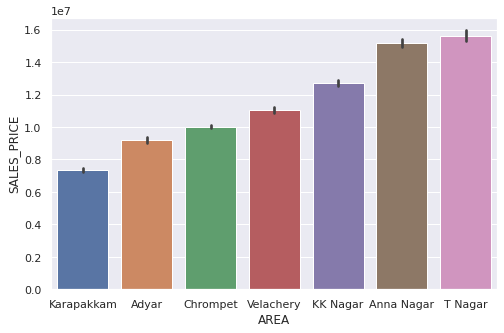

In [ ]:
data1['AREA'] = data1['AREA'].replace(['TNagar','Chrompt','Chrmpet','Karapakam','Ana Nagar','Chormpet','Adyr','Velchery','Ann Nagar','KKNagar'],['T Nagar','Chrompet','Chrompet','Karapakkam','Anna Nagar','Chrompet','Adyar','Velachery','Anna Nagar','KK Nagar'])
sns.set(rc = {'figure.figsize':(8,5)})
sns.barplot(x='AREA',y="SALES_PRICE",data=data1,order=data1.groupby("AREA")['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')["AREA"])

Here, AREA feature unique data types are ploted based on the mean of each data type(label) with respect to SALES PRICE. Compartively T Nagar area is having more mean sales price.

*  There is a relationship between AREA versus SALES PRICE==> AREA is a important feature.
*  There is a Linear relationship between  AREA versus SALES PRICE==> we can do Label encoding.



**2. Sale condition wrong format values replacement and Distribution count:**






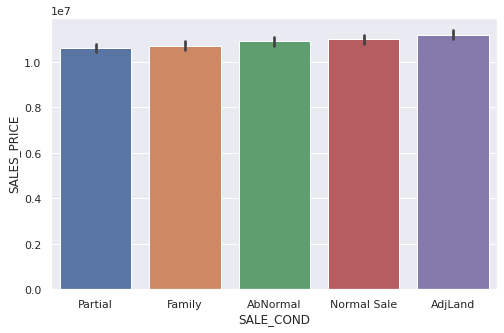

In [ ]:
data1['SALE_COND'] = data1['SALE_COND'].replace(['Ab Normal','Partiall','Adj Land','PartiaLl'],['AbNormal','Partial','AdjLand','Partial'])
sns.set_style(style='dark')

sns.set(rc = {'figure.figsize':(8,5)})
sns.barplot(x='SALE_COND',y="SALES_PRICE",data=data1,order=data1.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])

Here, Sales Condition feature unique data types are plotted based on the mean of each data type(label) with respect to Sales Price. Compartively AdjLand label data is having more mean sales price.

*  There is a slight relationship between Sales Condition versus Sales price==> Sales Condition is a important feature.
*  There is a Linear relationship between Sales Condition versus Sales price==> we can do Label encoding.



**3. Parking facility wrong format values replacement and Distribution count:**



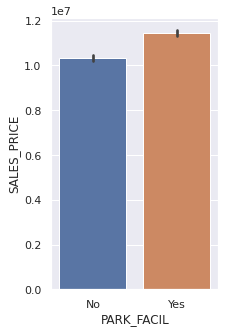

In [ ]:
data1['PARK_FACIL'] = data1['PARK_FACIL'].replace('Noo','No')
sns.set(rc = {'figure.figsize':(3,5)})
sns.barplot(x='PARK_FACIL',y="SALES_PRICE",data=data1,order=data1.groupby("PARK_FACIL")['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')["PARK_FACIL"])

Here, Parking facility feature unique data types are plotted based on the mean of each data type(label) with respect to Sales Price. Compartively Parking facility avalability is having more mean sales price.

*  There is a relationship between Parking facility versus Sales price==>
Parking facility is a important feature.
*  There is a Linear relationship between parking facility versus Sales price==> we can do Label encoding.

**4. Build Type wrong values replacement and Distribution count:**



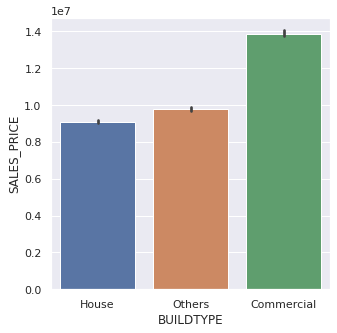

In [ ]:
data1['BUILDTYPE'] = data1['BUILDTYPE'].replace(['Other','Comercial'],['Others','Commercial'])
sns.set(rc = {'figure.figsize':(5,5)})
sns.barplot(x='BUILDTYPE',y="SALES_PRICE",data=data1,order=data1.groupby("BUILDTYPE")['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')["BUILDTYPE"])

Here, Build Type feature unique data types are plotted based on the mean of each data type with respect to Sales Price. Compartively Commercial Type is having more mean sales price.

*  There is a relationship between Build Type versus Sales price==> Build Type is a important feature.
*  No linear relationship==> we can do one-hot encoding.

**5. Utility Avail wrong format values replacement and Distribution count:**



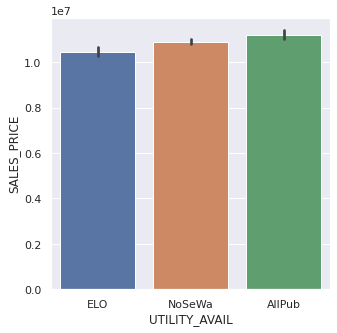

In [ ]:
data1['UTILITY_AVAIL'] = data1['UTILITY_AVAIL'].replace(['All Pub','NoSewr ','NoSewr'],['AllPub','NoSeWa','NoSeWa'])
sns.set(rc = {'figure.figsize':(5,5)})
sns.barplot(x='UTILITY_AVAIL',y="SALES_PRICE",data=data1,order=data1.groupby("UTILITY_AVAIL")['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])

Here, Utilities available feature unique data types are plotted based on the mean of each data type with respect to Sales Price. Compartively ALLPUB data is having more mean sales price.

*  There is a relationship between Utility Available versus Sales price==> Utility avail is a important feature.
*  There is a Linear relationship between Utility available versus Sales price==> we can do Label encoding.



**6. Street wrong format values replacement and Distribution count:**

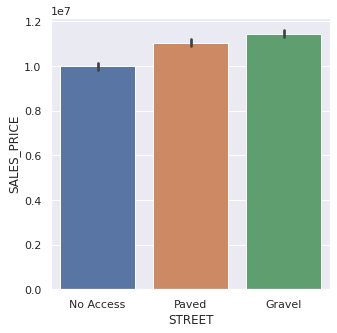

In [ ]:
data1['STREET'] = data1['STREET'].replace(['Pavd','NoAccess'],['Paved','No Access'])
sns.set(rc = {'figure.figsize':(5,5)})
sns.barplot(x='STREET',y="SALES_PRICE",data=data1,order=data1.groupby("STREET")['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')["STREET"])

Here, Street feature unique data types are plotted based on the mean of each data type(label) with respect to Sales Price. Compartively Gravel Street is having more mean sales price.

*  There is a relationship between Street versus Sales price==> Street is a important feature.
*  There is a Linear relationship between Street versus Sales price==> we can do Label encoding.




**7. MZZONE Barplot v/s Sales Price Distribution count:**

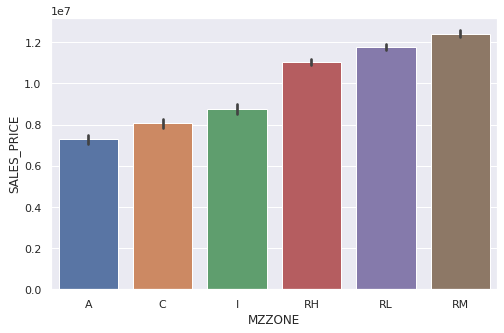

In [ ]:
sns.set(rc = {'figure.figsize':(8,5)})
sns.barplot(x='MZZONE',y="SALES_PRICE",data=data1,order=data1.groupby("MZZONE")['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')["MZZONE"])

Here, MZZONE feature unique data types are plotted based on the mean of each data type with respect to Sales Price. Compartively RM zone is having more mean sales price.

*  There is a relationship between MZZONE versus Sales price==> MZZONE is a important feature.
*  There is a Linear trend between MZZONE versus Sales price==> we can do both Label encoding and one-hot encoding.



**GAUSSIAN DISTRIBUTION IN TARGET VARIABLE**

Text(0.5, 1.0, 'Original Sale Price Histogram')

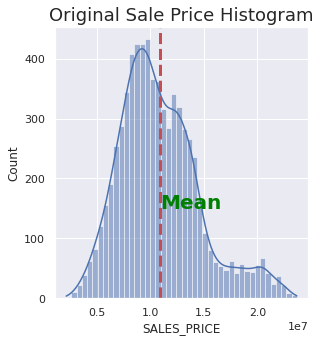

In [ ]:
plt.figure(figsize = (10,5))
ax1 = plt.subplot(1,2,1)
sns.histplot(data1['SALES_PRICE'],palette='blues_r',kde=True)
plt.axvline(x=data1['SALES_PRICE'].mean(), color='r', linestyle='--',linewidth=3)
plt.text(data1['SALES_PRICE'].mean(),150, "Mean",horizontalalignment='left',size=20, color='green',weight='semibold')
plt.title('Original Sale Price Histogram',fontsize=18)

By plotting the target variable(SALES_PRICE) as histogram, wecan see that the data is Right Skewed(positive skewed) and the mean also at the right ofthe peak. Thus, LOG normal distribution is required.

**Computing the Sales Price**

In [ ]:
mean = data1['SALES_PRICE'].mean()
std = data1['SALES_PRICE'].std()
skew = data1['SALES_PRICE'].skew()
print('Saleprice : mean: {0:.4f}, std: {1:.4f}, skew: {2:.4f}'.format(mean, std, skew))

Saleprice : mean: 10888008.2164, std: 3769081.2979, skew: 0.7755


Interpretation: The obtained skewness is 0.7755 and the metric is RMSLE. Therefore, log scale is required.

**Numerical Features from the data**

In [ ]:
numerical_features = [feature for feature in data1.columns if data1[feature].dtype != 'O']
print('Number of numerical variables: ', len(numerical_features))
numerical_features=data1[numerical_features]
numerical_features

Number of numerical variables:  15


,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,Yearsold,Yearbuild,Houselife
0,1004,131,1.0,1.0,3,4.0,3.9,4.9,4.330,380000,144400,7600000,2011,1967,44
1,1986,26,2.0,1.0,5,4.9,4.2,2.5,3.765,760122,304049,21717770,2006,1995,11
2,909,70,1.0,1.0,3,4.1,3.8,2.2,3.090,421094,92114,13159200,2012,1992,20
3,1855,14,3.0,2.0,5,4.7,3.9,3.6,4.010,356321,77042,9630290,2010,1988,22
4,1226,84,1.0,1.0,3,3.0,2.5,4.1,3.290,237000,74063,7406250,2009,1979,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,598,51,1.0,1.0,2,3.0,2.2,2.4,2.520,208767,107060,5353000,2011,1962,49
7105,1897,52,3.0,2.0,5,3.6,4.5,3.3,3.920,346191,205551,10818480,2004,1995,9
7106,1614,152,2.0,1.0,4,4.3,4.2,2.9,3.840,317354,167028,8351410,2006,1978,28
7107,787,40,1.0,1.0,2,4.6,3.8,4.1,4.160,425350,119098,8507000,2009,1977,32


Observation: Since the numerical variables are of two types: 1.Continuous 2.Discrete, we have to seperate them individually.

**Seperating Discrete Features:**

In [ ]:
discrete_feature=[feature for feature in numerical_features if len(data1[feature].unique())<20 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
discrete_feature

Discrete Variables Count: 4


['N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'Yearsold']

In [ ]:
print(np.unique(data1['Yearbuild']))
data1['Yearbuild'].value_counts()

[1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962
 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976
 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990
 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010]


1985    197
1988    197
2002    191
1990    189
1996    188
       ... 
1954     11
2010      9
1951      6
1949      2
1950      2
Name: Yearbuild, Length: 62, dtype: int64

**Seperating the Continuous features:**

In [ ]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous Feature Count: {}".format(len(continuous_feature)))
continuous_feature

Continuous Feature Count: 11


['INT_SQFT',
 'DIST_MAINROAD',
 'QS_ROOMS',
 'QS_BATHROOM',
 'QS_BEDROOM',
 'QS_OVERALL',
 'REG_FEE',
 'COMMIS',
 'SALES_PRICE',
 'Yearbuild',
 'Houselife']

**DISCRETE FEATURES v/s SALES PRICE**

**Discrete Feature include:**

* **N_Bedroom v/s Sales Price** 
* **N_Bathroom v/s Sales Price**
* **N_Room v/s Sales Price**
* **YearSold v/s Sales Price**


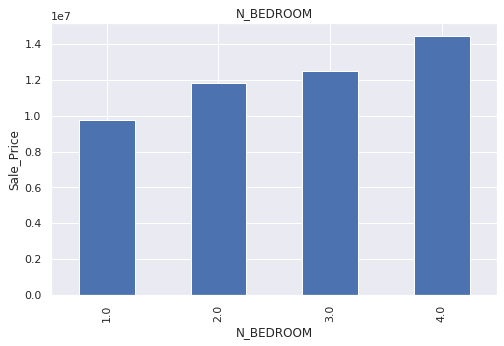

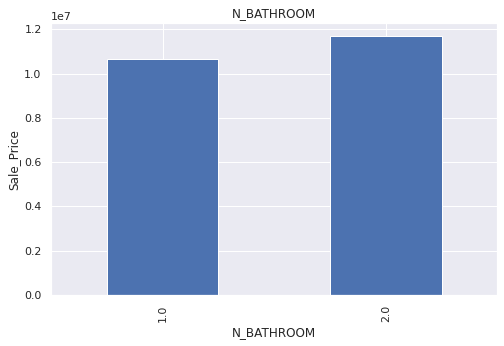

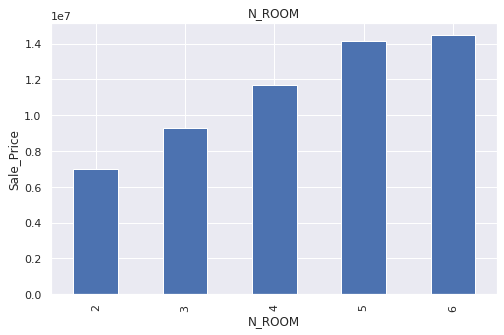

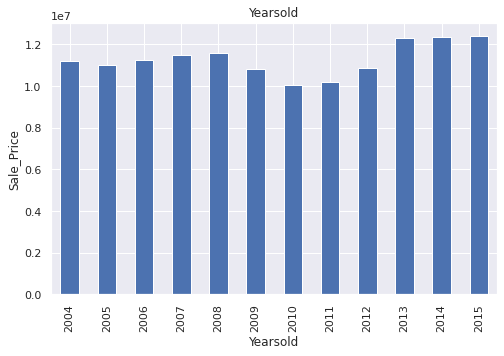

In [ ]:
for feature in discrete_feature:
  data1.groupby(feature)['SALES_PRICE'].mean().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('Sale_Price')
  plt.title(feature)
  plt.show()

1. N_Bedroom v/s Sales Price: More the bedrooms are the sales price increases.
2. N_Bathroom v/s Sales Price: price increase due to more bathrooms.
3. N_Room v/s Sales Price: Sales price will shoot up for more numbers of rooms.
4. YearSold v/s Sales Price: More sold happend between 2013-2015.

**CONTINUOUS FEATURES v/s SALES PRICE**

**Continuous Feature include:**

*  **INT_SQFT v/s Count**
*  **DIST_MAINROAD v/s Count**
*  **QS_ROOM v/s Count**
*  **QS_BATHROOM v/s Count**
*  **QS_BEDROOM v/s Count** 
*  **QS_OVERALL v/s Count**
*  **REG_FEE v/s Count** 
*  **COMMIS v/s Count**
*  **YEARBUILD v/s Count** 
*  **HOUSELIFE v/s Count**
*  **SALES_PRICE v/s Count**











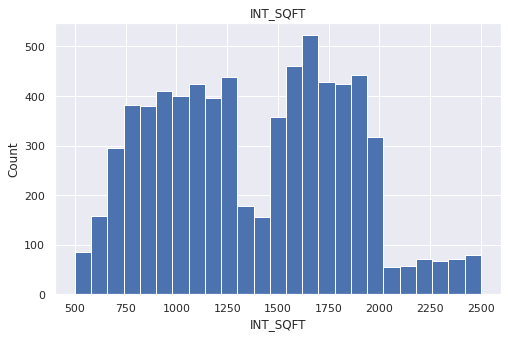

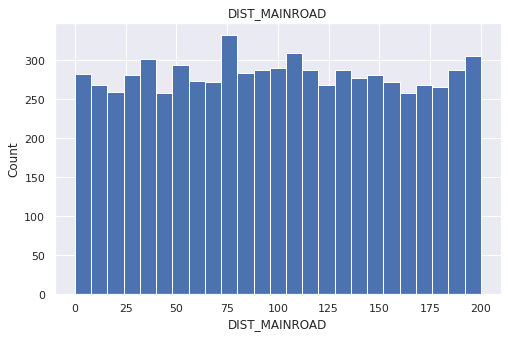

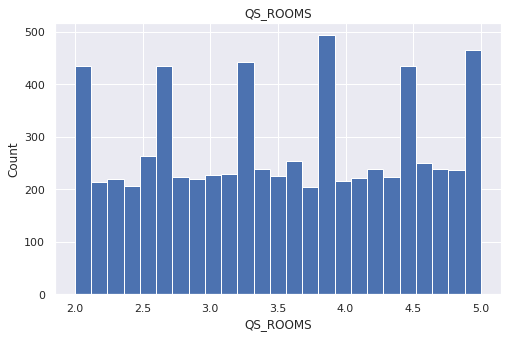

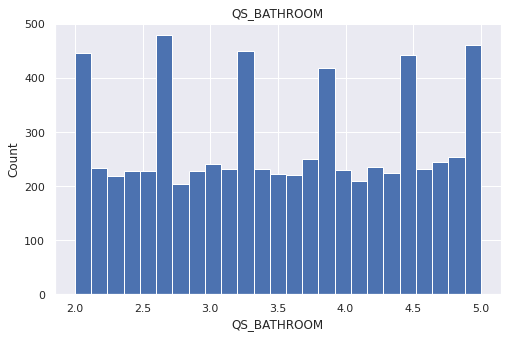

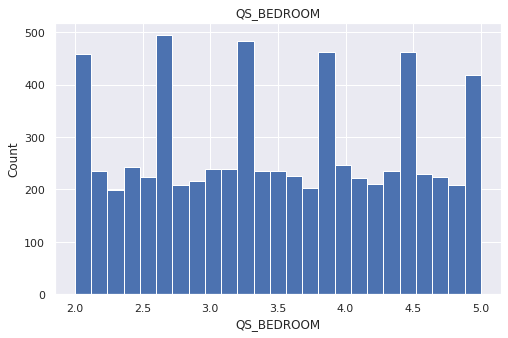

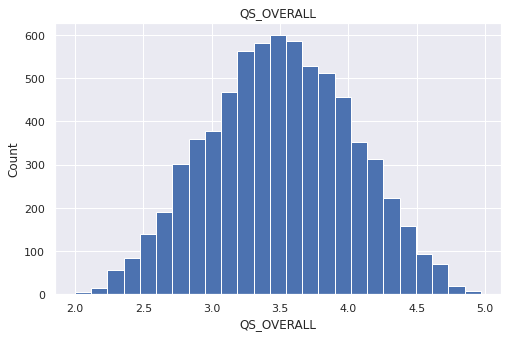

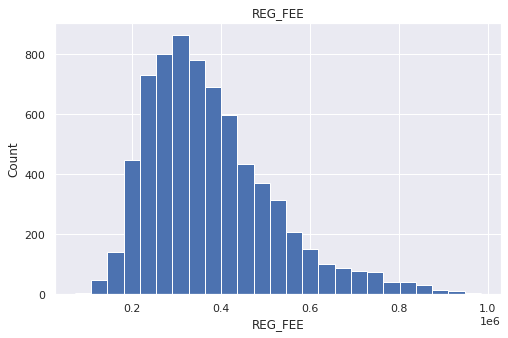

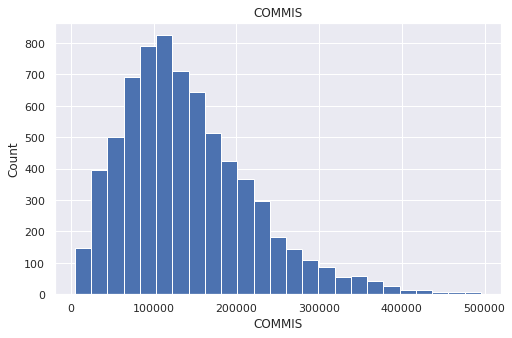

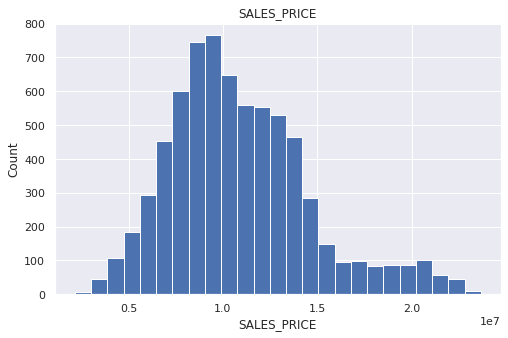

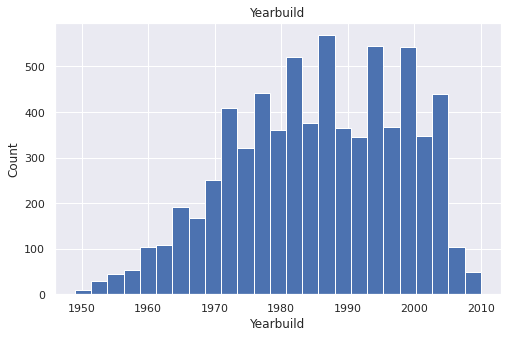

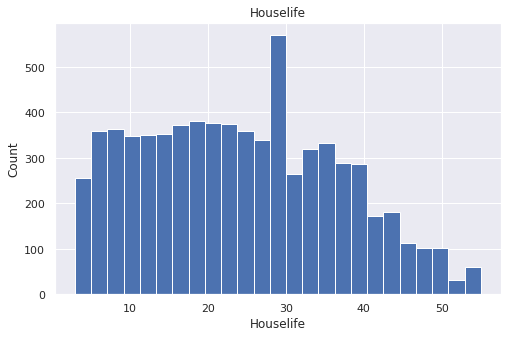

In [ ]:
for feature in continuous_feature:
  data1[feature].hist(bins=25)
  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.title(feature)
  plt.show()

**Continuous feature v/s Sales Price to find Linear relationship**

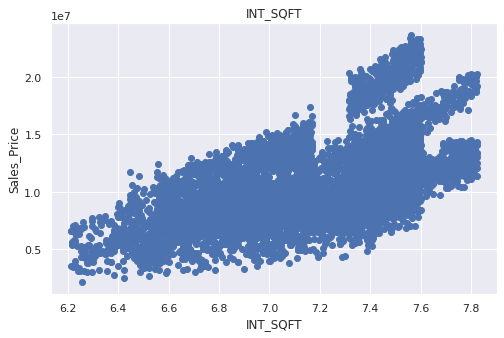

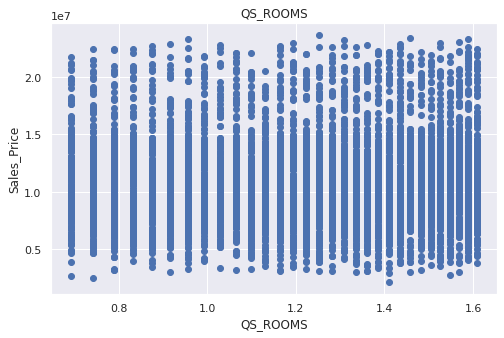

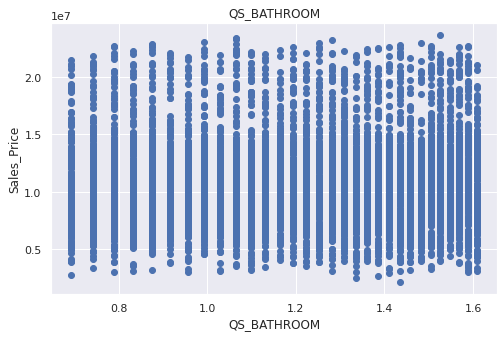

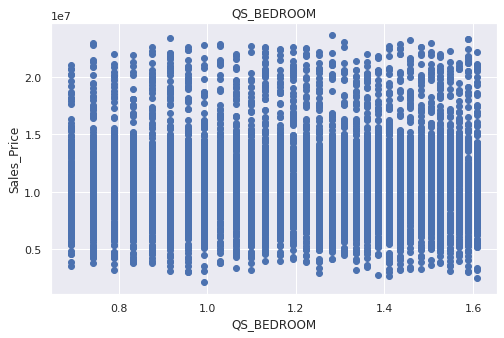

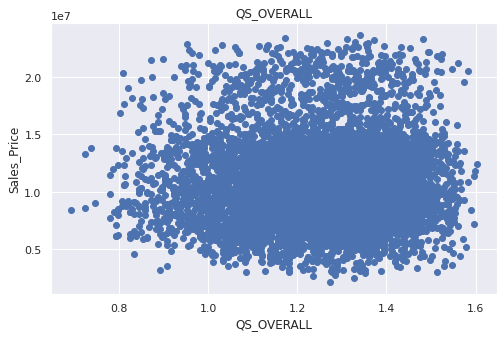

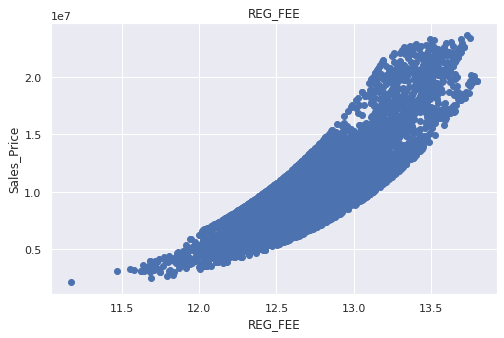

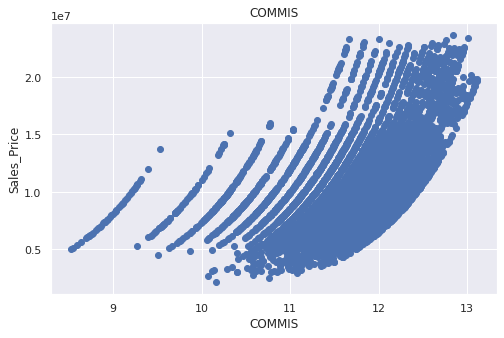

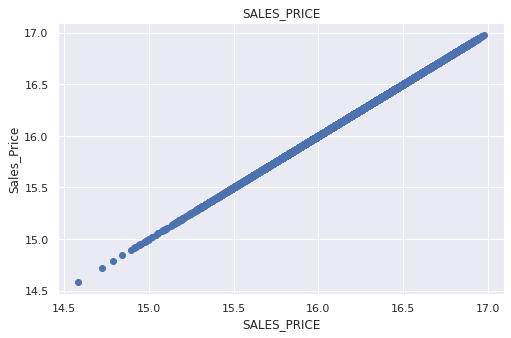

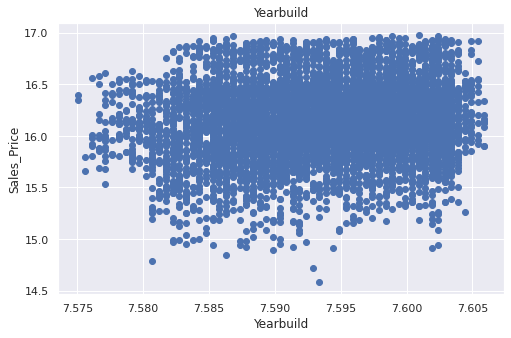

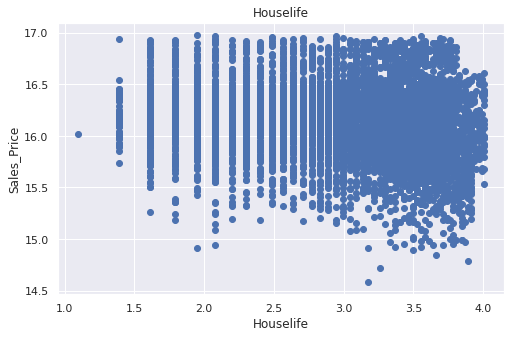

In [ ]:
for feature in continuous_feature:
  if 0 in data1[feature].unique():
    pass
  else:
    data1[feature]=np.log(data1[feature])
    plt.scatter(data1[feature],data1['SALES_PRICE'])
    plt.xlabel(feature)
    plt.ylabel('Sales_Price')
    plt.title(feature)
    plt.show()

**Alliance between Lifetime of house and Sales Price**

Text(0.5, 1.0, 'House life v/s Sales_Price')

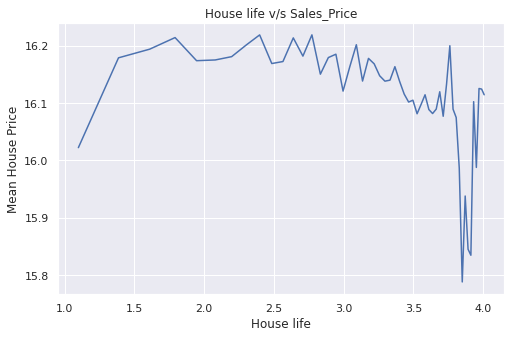

In [ ]:
data1.groupby('Houselife')['SALES_PRICE'].mean().plot()
plt.xlabel('House life')
plt.ylabel('Mean House Price')
plt.title("House life v/s Sales_Price")

**Alliance between House sold in years and Sales Price**

Text(0.5, 1.0, 'House Price v/s Year Sold')

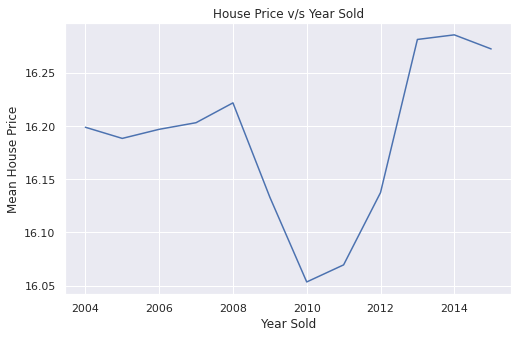

In [ ]:
data1.groupby('Yearsold')['SALES_PRICE'].mean().plot()
plt.xlabel('Year Sold')
plt.ylabel('Mean House Price')
plt.title("House Price v/s Year Sold")

**ENCODING**

In [ ]:
data1.head(2)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,...,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,Yearsold,Yearbuild,Houselife
0,Karapakkam,6.911747,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,...,1.386294,1.360977,1.589235,1.465568,12.847927,11.880343,15.843659,2011,7.584265,3.784190
1,Anna Nagar,7.593878,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,...,1.589235,1.435085,0.916291,1.325748,13.541234,12.624944,16.893641,2006,7.598399,2.397895


In [ ]:
data1.groupby('AREA')['SALES_PRICE'].agg([('vals','mean')]).sort_values(by= 'vals')

,vals
AREA,
Karapakkam,15.761315
Adyar,15.998690
Chrompet,16.096598
Velachery,16.187019
KK Nagar,16.333259
Anna Nagar,16.509090
T Nagar,16.538046


In [ ]:
data1['AREA'] = data1['AREA'].replace({
    'Karapakkam' : 0,
    'Adyar' : 1,
    'Chrompet' : 2,
    'Velachery' : 3,
    'KK Nagar' : 4,
    'Anna Nagar' : 5,
    'T Nagar' : 6
})


In [ ]:
data1.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')

,SALE_COND,SALES_PRICE
4,Partial,16.117855
2,Family,16.125433
0,AbNormal,16.147210
3,Normal Sale,16.151751
1,AdjLand,16.174342


In [ ]:
data1['SALE_COND'] = data1['SALE_COND'].replace({
    'Partial' : 0,
    'Family' : 1,
    'AbNormal' : 2,
    'Normal Sale' : 3,
    'AdjLand' : 4
})

In [ ]:
data1['PARK_FACIL'] = data1['PARK_FACIL'].replace({
    'No' : 0,
    'Yes' : 1
})

In [ ]:
build_type = pd.get_dummies(data1['BUILDTYPE'], drop_first = True)

In [ ]:
data1.groupby("UTILITY_AVAIL")['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')

,UTILITY_AVAIL,SALES_PRICE
1,ELO,16.097330
2,NoSeWa,16.147640
0,AllPub,16.172335


In [ ]:
data1['UTILITY_AVAIL'] = data1['UTILITY_AVAIL'].replace({
    'ELO' : 0,
    'NoSeWa' : 1,
    'AllPub' : 2
})

In [ ]:
data1.groupby("STREET")['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')

,STREET,SALES_PRICE
1,No Access,16.049181
2,Paved,16.161241
0,Gravel,16.200624


In [ ]:
data1['STREET'] = data1['STREET'].replace({
    'No Access' : 0,
    'Paved' : 1,
    'Gravel' : 2,
})

In [ ]:
data1.groupby("MZZONE")['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')

,MZZONE,SALES_PRICE
0,A,15.737044
1,C,15.844557
2,I,15.934662
3,RH,16.169545
4,RL,16.236874
5,RM,16.292417


In [ ]:
data1['MZZONE'] = data1['MZZONE'].replace({
    'A' : 0,
    'C' : 1,
    'I' : 2,
    'RH' : 3,
    'RL' : 4,
    'RM' : 5,
})


In [ ]:
data1=df_new = pd.concat([data1, build_type], axis = 1)

In [ ]:
data1.head(2)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,...,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,Yearsold,Yearbuild,Houselife,House,Others
0,0,6.911747,131,1.0,1.0,3,2,1,Commercial,2,...,1.589235,1.465568,12.847927,11.880343,15.843659,2011,7.584265,3.784190,0,0
1,5,7.593878,26,2.0,1.0,5,2,0,Commercial,2,...,0.916291,1.325748,13.541234,12.624944,16.893641,2006,7.598399,2.397895,0,0


In [ ]:
data1.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE', 'Yearsold',
       'Yearbuild', 'Houselife', 'House', 'Others'],
      dtype='object')

In [ ]:
data1.drop(['BUILDTYPE'], axis = 1, inplace = True)

In [ ]:
data1.head(2)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,...,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,Yearsold,Yearbuild,Houselife,House,Others
0,0,6.911747,131,1.0,1.0,3,2,1,2,1,...,1.589235,1.465568,12.847927,11.880343,15.843659,2011,7.584265,3.784190,0,0
1,5,7.593878,26,2.0,1.0,5,2,0,2,2,...,0.916291,1.325748,13.541234,12.624944,16.893641,2006,7.598399,2.397895,0,0


In [ ]:
data1.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET',
       'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL',
       'REG_FEE', 'COMMIS', 'SALES_PRICE', 'Yearsold', 'Yearbuild',
       'Houselife', 'House', 'Others'],
      dtype='object')

**Reg_fee and Commission are happend only after the Sale is done. So we cant consider them as an independent feature. Lets add them in target feature.**

In [ ]:
data1['SALES_PRICE'] = data1['REG_FEE'] + data1['COMMIS'] + data1['SALES_PRICE']

In [ ]:
data1.drop(['REG_FEE','COMMIS'], axis = 1, inplace = True)

In [ ]:
data1.isnull().sum()

AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
Yearsold         0
Yearbuild        0
Houselife        0
House            0
Others           0
dtype: int64

**MODELLING**

In [ ]:
x = data1.drop(['SALES_PRICE'], axis = 1).copy()
y = data1['SALES_PRICE'].copy()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
x_train.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET',
       'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL',
       'Yearsold', 'Yearbuild', 'Houselife', 'House', 'Others'],
      dtype='object')

Transform features which dont have linear relationship with target feature

In [ ]:
x_train['DIST_MAINROAD'] = sc.fit_transform(x_train[['DIST_MAINROAD']])
x_test['DIST_MAINROAD'] = sc.transform(x_test[['DIST_MAINROAD']])

x_train['Yearbuild'] = sc.fit_transform(x_train[['Yearbuild']])
x_test['Yearbuild'] = sc.transform(x_test[['Yearbuild']])

x_train['Yearsold'] = sc.fit_transform(x_train[['Yearsold']])
x_test['Yearsold'] = sc.transform(x_test[['Yearsold']])

x_train['Houselife'] = sc.fit_transform(x_train[['Houselife']])
x_test['Houselife'] = sc.transform(x_test[['Houselife']])

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr_model = LinearRegression()

In [ ]:
lr_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
pred = lr_model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, pred)

0.814809306806913

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
var_thres = VarianceThreshold(threshold=1)
var_thres.fit(x_train)

VarianceThreshold(threshold=1)

In [ ]:
var_thres.get_support()

array([ True, False, False, False, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False])

In [ ]:
constant_names = [column for column in x_train.columns if column not in x.columns[var_thres.get_support()]]
constant_names

['INT_SQFT',
 'DIST_MAINROAD',
 'N_BEDROOM',
 'N_BATHROOM',
 'PARK_FACIL',
 'UTILITY_AVAIL',
 'STREET',
 'QS_ROOMS',
 'QS_BATHROOM',
 'QS_BEDROOM',
 'QS_OVERALL',
 'Yearsold',
 'Yearbuild',
 'House',
 'Others']

In [ ]:
x_train.columns[var_thres.get_support()]

Index(['AREA', 'N_ROOM', 'SALE_COND', 'MZZONE', 'Houselife'], dtype='object')

In [ ]:
x_train_sup = x_train[x_train.columns[var_thres.get_support()]]
x_test_sup = x_test[x_test.columns[var_thres.get_support()]]

Build model with selected features

In [ ]:
lr = LinearRegression()
lr.fit(x_train_sup, y_train)

LinearRegression()

In [ ]:
pred = lr.predict(x_test_sup)

In [ ]:
r2_score(y_test, pred)

0.5467990634036285

Selected features gives less r2 score so lets use all the values to ML model and try all regressor to fit and predict

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor

In [ ]:
lin_reg = LinearRegression()
svr = SVR()
sgdr = SGDRegressor()
rr = RandomForestRegressor()
xgb = XGBRegressor()
d_tree = DecisionTreeRegressor()

In [ ]:
lin_reg.fit(x_train, y_train)
pred = lin_reg.predict(x_test)
print('r2')
print(r2_score(y_test, pred))

r2
0.814809306806913


In [ ]:
d_tree.fit(x_train, y_train)
pred = d_tree.predict(x_test)
print('r2')
print(r2_score(y_test, pred))

r2
0.6295071901497846


In [ ]:
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)
print('r2')
print(r2_score(y_test, pred))

[12:35:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2
0.8240367769133491


In [ ]:
svr.fit(x_train, y_train)
pred = svr.predict(x_test)
print('r2')
print(r2_score(y_test, pred))

r2
0.8182293738558851


In [ ]:
sgdr.fit(x_train, y_train)
pred = sgdr.predict(x_test)
print('r2')
print(r2_score(y_test, pred))

r2
0.6343340608824808


In [ ]:
rr.fit(x_train, y_train)
pred = rr.predict(x_test)
print('r2')
print(r2_score(y_test, pred))

r2
0.8033778176338244


**Got better r2 score with XGB Regressor**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(xgb, x_train, y_train, scoring = 'r2', cv = 5)

[12:35:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:35:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:35:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:35:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:35:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([0.82947264, 0.8227849 , 0.84141745, 0.83148818, 0.82367011])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(100, 500, 1000)]
max_features = ['auto']
max_depth = [int(x) for x in np.linspace(5, 10, 30)]
learning_rate = [0.01, 0.05, 0.15]
gamma = [0.0, 0.1, 0.4]
min_child_weight = [ 1, 3, 7]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'learning_rate': learning_rate,
               'gamma': gamma,
               'min_child_weight': min_child_weight}

In [ ]:
rcv = RandomizedSearchCV(xgb, random_grid, n_iter = 20, cv = 3, verbose = 2, random_state = 42, n_jobs = -1)

In [ ]:
rcv.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[12:36:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=3, estimator=XGBRegressor(), n_iter=20, n_jobs=-1,
                   param_distributions={'gamma': [0.0, 0.1, 0.4],
                                        'learning_rate': [0.01, 0.05, 0.15],
                                        'max_depth': [5, 5, 5, 5, 5, 5, 6, 6, 6,
                                                      6, 6, 6, 7, 7, 7, 7, 7, 7,
                                                      8, 8, 8, 8, 8, 8, 9, 9, 9,
                                                      9, 9, 10],
                                        'max_features': ['auto'],
                                        'min_child_weight': [1, 3, 7],
                                        'n_estimators': [100, 100, 100, 101,
                                                         101, 102, 102, 102,
                                                         103, 103, 104, 104,
                                                         104, 105, 105, 106,
                               

In [ ]:
rcv.best_score_

0.8275305787851122

In [ ]:
rcv.best_params_

{'gamma': 0.4,
 'learning_rate': 0.05,
 'max_depth': 5,
 'max_features': 'auto',
 'min_child_weight': 7,
 'n_estimators': 166}

In [ ]:
xgb_regressor = XGBRegressor(gamma = 0.4, learning_rate = 0.05, max_depth = 5, max_features = 'auto', min_child_weight = 7, n_estimators = 166)

In [ ]:
xgb_regressor.fit(x_train, y_train)

[12:36:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(gamma=0.4, learning_rate=0.05, max_depth=5, max_features='auto',
             min_child_weight=7, n_estimators=166)

In [ ]:
pred_vals = xgb_regressor.predict(x_test)

In [ ]:
r2_score(y_test, pred_vals)

0.8228393173548082

In [ ]:
pd.DataFrame({'Important_features':xgb_regressor.feature_importances_},index = x_train.columns).sort_values(by = 'Important_features', ascending = False)

,Important_features
N_ROOM,0.312056
AREA,0.188430
Others,0.141948
MZZONE,0.084997
INT_SQFT,0.083819
House,0.058402
PARK_FACIL,0.036876
STREET,0.023330
Yearbuild,0.008082
SALE_COND,0.007955


**These are the Top Features that has to be considered for project**

1.  N_ROOM
2.  AREA  
3.  Others
4.  MZZone
5.  INT_SQFT
6.  House
7.  PARK_FACIL
8.  STREET
9.  Yearbuild
10. SALE_COND



